# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Zulfiqar Fauzul Akbar
- Email: zulfikar.fauzul.akbar@gmail.com
- Id Dicoding: moon77

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Kategori produk apa yang paling banyak dibeli?
- pertanyaan 2 : Bagaimana jumlah pesanan perbulan? apakah ada tren tertentu?

## Menyaipkan semua library yang dibuthkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

load required data from csv

In [2]:
df_products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
df_order_item = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
df_orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')

### Assessing Data

#### data produk

contoh 5 data dan banyak data

In [3]:
print("banyak data produk:",len(df_products.index))
display(df_products.head())

banyak data produk: 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


cek apakah product_id unique

In [4]:
print("Banyak produk id duplicate: ",df_products['product_id'].duplicated().sum())

Banyak produk id duplicate:  0


cek null

In [5]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Cek tipe data setiap kolom

In [6]:
df_products.dtypes

product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object

#### data tabel penggabung order dan item

contoh 5 data dan banyak data

In [7]:
print("banyak data penggabung:",len(df_order_item.index))
display(df_order_item.head())

banyak data penggabung: 112650


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


cek null

In [8]:
df_order_item.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

contoh 5 data dan banyak data

In [9]:
df_order_item.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

shipping_limit_date seharusnya bertipe data datetime

#### data order

contoh 5 data dan banyak data

In [10]:
print("banyak data order:",len(df_orders.index))
display(df_orders.head())

banyak data order: 99441


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


cek apakah order_id unique

In [11]:
print("Banyak order id duplicate: ",df_orders['order_id'].duplicated().sum())

Banyak order id duplicate:  0


cek null

In [12]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Data berikut seharusnya bertipe data datetime
- order_purchase_timestamp         
- order_approved_at                
- order_delivered_carrier_date     
- order_delivered_customer_date    
- order_estimated_delivery_date    

### Cleaning Data

Drop data yang memiliki value product_category_name null pada data produk

In [14]:
df_products.dropna(axis=0, inplace=True, subset=['product_category_name'])

drop data order yang memiliki null

In [15]:
df_orders.dropna(axis=0, inplace=True)

Menyesuaikan tipe data

In [16]:
df_order_item['shipping_limit_date'] = pd.to_datetime(df_order_item['shipping_limit_date'], format='mixed')

In [17]:
columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in columns:
    df_orders[column] = pd.to_datetime(df_orders[column])

Menggabung tabel item dengan tabel penggabung order dan item

In [18]:
df_products_order_item = pd.merge(
    left=df_products,
    right=df_order_item,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

## Exploratory Data Analysis (EDA)

### Explore top product categorytop_product_category

get top 5 kategori produk

In [19]:
top_product_category = df_products_order_item.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(5)
top_product_category

product_category_name
cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
Name: order_id, dtype: int64

### Explore monthly order count

ambil data perbulan dengan grouping berdasarkan tahun dan bulan

In [20]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

In [21]:
group_param = df_orders['order_purchase_timestamp'].dt.to_period("M")
monthly_order = df_orders.groupby(group_param).order_id.nunique()
monthly_order

order_purchase_timestamp
2016-09       1
2016-10     270
2016-12       1
2017-01     748
2017-02    1641
2017-03    2546
2017-04    2303
2017-05    3545
2017-06    3135
2017-07    3872
2017-08    4193
2017-09    4149
2017-10    4478
2017-11    7288
2017-12    5513
2018-01    7069
2018-02    6556
2018-03    7003
2018-04    6798
2018-05    6749
2018-06    6096
2018-07    6156
2018-08    6351
Freq: M, Name: order_id, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: 

<Axes: xlabel='product_category_name'>

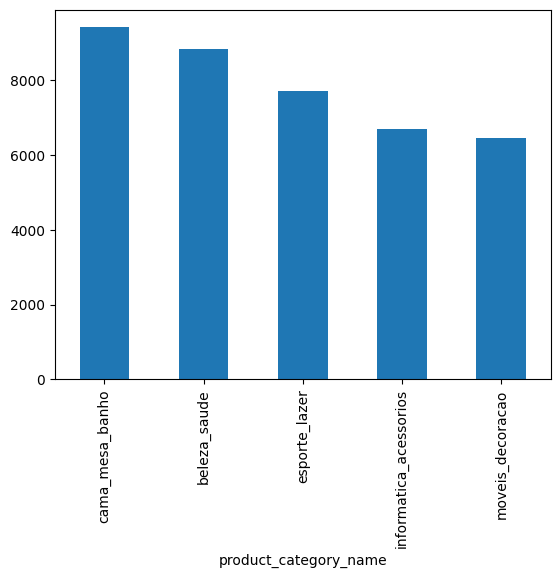

In [22]:
top_product_category.plot.bar()

### Pertanyaan 2: 

<Axes: xlabel='order_purchase_timestamp'>

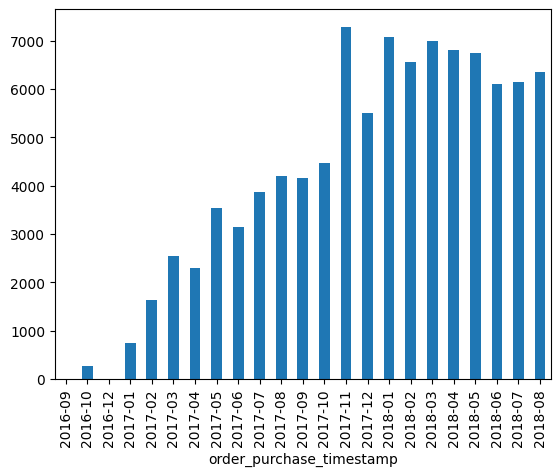

In [23]:
monthly_order.plot.bar()

## Conclusion

- Conclution pertanyaan 1 : kategori produk paling sering di beli adalah cama_mesa_banho diikuti dengan beleza_saude, esporte_lazer, informatica_acessorios, dan moveis_decoracao. 
- conclution pertanyaan 2 : jumlah pesanan paling sedikit terjadi pada bulan 12 tahun 2016 dan paling tinggi pada bulan 11 tahun 2017, data penjualan perbulan juga menunjukkan tren linear naik.